In [11]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.8 MB/s eta 0:00:00:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
from qiskit import *
import numpy as np
from qiskit_aer import Aer
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

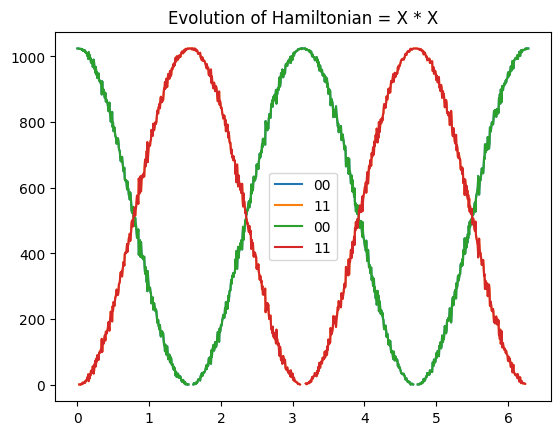

In [40]:
def simulate_hamiltonian_X_X(t):
    a = 1

    qc = QuantumCircuit(2,2)

    qc.h(0)
    qc.h(1)
    qc.cx(0,1)
    qc.rz(2 * a * t, 1)
    qc.cx(0,1)
    qc.h(0)
    qc.h(1)

    qc.measure(0,0)
    qc.measure(1,1)

    qc.draw()

    simulator = Aer.get_backend('qasm_simulator')

    circ = transpile(qc, simulator)
    result = simulator.run(circ).result()
    # counts = result.get_counts()
    # plot_histogram(counts)

    return result

counts_00 = []
counts_01 = []
counts_10 = []
counts_11 = []

times = np.linspace(0, 2 * np.pi, 1000)
for t in times:
    result = simulate_hamiltonian_X_X(t)

    counts_00.append(result.get_counts().get('00'))
    counts_01.append(result.get_counts().get('01'))
    counts_10.append(result.get_counts().get('10'))
    counts_11.append(result.get_counts().get('11'))

plt.figure()
plt.plot(times, counts_00, label='00')
plt.plot(times, counts_11, label='11')
plt.plot(times, counts_00, label='00')
plt.plot(times, counts_11, label='11')
plt.legend()
plt.title("Evolution of Hamiltonian = X * X")
plt.show()

# op = qi.Operator(circ)
# print(np.array(op).real)